In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import numpy as np
import tqdm

from dataset import Dataset
ds = Dataset(file_path='./data', window_size = 20, test_size = 1000)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]


In [2]:
(train_features, train_labels), (test_features, test_labels) = ds.get_dataset()
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.06s/it]


['KRW-BTC'] are combined as training set
completed
torch.Size([66448, 20, 23]) torch.Size([66448, 3])
torch.Size([980, 20, 23]) torch.Size([980, 3])


In [3]:
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.1)
print(train_features.shape, train_labels.shape)
print(val_features.shape, val_labels.shape)

torch.Size([59803, 20, 23]) torch.Size([59803, 3])
torch.Size([6645, 20, 23]) torch.Size([6645, 3])


## Dataset

In [4]:
train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

## DataLoader

In [5]:
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

## Model

In [6]:
from model import Model
model = Model(input_size = train_features.shape[2], recurrent_hidden_size = 128, dense_hidden_size = 256, output_size = 3)

## Train

In [7]:
from torch.optim import Adam
from train import Trainer

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cuda:0


Model(
  (gru): GRU(23, 128, num_layers=2, batch_first=True, bidirectional=True)
  (dense1): Linear(in_features=256, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=False)
)

In [8]:
MSE = nn.MSELoss(reduction = 'mean')
trainer = Trainer(model, train_loader, val_loader, criterion = MSE, optimizer = Adam,
                  epochs = 150, lr = 0.00001, device = device)
trainer.fit()

  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 1/150, train_loss: 0.00002436, val_loss: 0.00000654


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.26it/s]

epoch: 2/150, train_loss: 0.00000586, val_loss: 0.00000569


  4%|███▏                                                                              | 9/234 [00:00<00:02, 84.83it/s]

epoch: 3/150, train_loss: 0.00000535, val_loss: 0.00000534


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.00it/s]

epoch: 4/150, train_loss: 0.00000506, val_loss: 0.00000512


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 5/150, train_loss: 0.00000488, val_loss: 0.00000497


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.95it/s]

epoch: 6/150, train_loss: 0.00000474, val_loss: 0.00000485


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 7/150, train_loss: 0.00000462, val_loss: 0.00000474


  9%|██████▉                                                                          | 20/234 [00:00<00:02, 99.09it/s]

epoch: 8/150, train_loss: 0.00000452, val_loss: 0.00000464


  4%|███▍                                                                             | 10/234 [00:00<00:02, 98.92it/s]

epoch: 9/150, train_loss: 0.00000443, val_loss: 0.00000456


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.95it/s]

epoch: 10/150, train_loss: 0.00000436, val_loss: 0.00000451


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 11/150, train_loss: 0.00000428, val_loss: 0.00000443


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 12/150, train_loss: 0.00000422, val_loss: 0.00000441


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 13/150, train_loss: 0.00000416, val_loss: 0.00000434


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 14/150, train_loss: 0.00000411, val_loss: 0.00000428


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.06it/s]

epoch: 15/150, train_loss: 0.00000406, val_loss: 0.00000424


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 16/150, train_loss: 0.00000401, val_loss: 0.00000417


  4%|███▍                                                                             | 10/234 [00:00<00:02, 91.66it/s]

epoch: 17/150, train_loss: 0.00000397, val_loss: 0.00000413


  4%|███▍                                                                             | 10/234 [00:00<00:02, 91.66it/s]

epoch: 18/150, train_loss: 0.00000392, val_loss: 0.00000408


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 19/150, train_loss: 0.00000388, val_loss: 0.00000405


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 20/150, train_loss: 0.00000385, val_loss: 0.00000402


  3%|██▊                                                                               | 8/234 [00:00<00:02, 78.36it/s]

epoch: 21/150, train_loss: 0.00000381, val_loss: 0.00000398


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.74it/s]

epoch: 22/150, train_loss: 0.00000378, val_loss: 0.00000396


  4%|███▍                                                                             | 10/234 [00:00<00:02, 99.91it/s]

epoch: 23/150, train_loss: 0.00000375, val_loss: 0.00000393


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 24/150, train_loss: 0.00000372, val_loss: 0.00000390


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 25/150, train_loss: 0.00000368, val_loss: 0.00000389


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 26/150, train_loss: 0.00000366, val_loss: 0.00000386


  4%|███▏                                                                              | 9/234 [00:00<00:02, 86.46it/s]

epoch: 27/150, train_loss: 0.00000363, val_loss: 0.00000381


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 28/150, train_loss: 0.00000361, val_loss: 0.00000379


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 29/150, train_loss: 0.00000358, val_loss: 0.00000375


  3%|██▊                                                                               | 8/234 [00:00<00:02, 79.13it/s]

epoch: 30/150, train_loss: 0.00000355, val_loss: 0.00000376


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 31/150, train_loss: 0.00000353, val_loss: 0.00000374


  4%|███▏                                                                              | 9/234 [00:00<00:02, 85.64it/s]

epoch: 32/150, train_loss: 0.00000350, val_loss: 0.00000371


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 33/150, train_loss: 0.00000348, val_loss: 0.00000367


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.74it/s]

epoch: 34/150, train_loss: 0.00000346, val_loss: 0.00000364


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 35/150, train_loss: 0.00000344, val_loss: 0.00000363


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 36/150, train_loss: 0.00000342, val_loss: 0.00000361


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 37/150, train_loss: 0.00000340, val_loss: 0.00000358


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 38/150, train_loss: 0.00000337, val_loss: 0.00000358


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 39/150, train_loss: 0.00000336, val_loss: 0.00000354


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 40/150, train_loss: 0.00000334, val_loss: 0.00000354


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 41/150, train_loss: 0.00000331, val_loss: 0.00000350


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 88.87it/s]

epoch: 42/150, train_loss: 0.00000330, val_loss: 0.00000351


  9%|██████▉                                                                          | 20/234 [00:00<00:02, 95.63it/s]

epoch: 43/150, train_loss: 0.00000328, val_loss: 0.00000348


  4%|███▏                                                                              | 9/234 [00:00<00:02, 85.64it/s]

epoch: 44/150, train_loss: 0.00000326, val_loss: 0.00000344


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 45/150, train_loss: 0.00000324, val_loss: 0.00000346


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 46/150, train_loss: 0.00000323, val_loss: 0.00000342


  3%|██▊                                                                               | 8/234 [00:00<00:02, 77.60it/s]

epoch: 47/150, train_loss: 0.00000321, val_loss: 0.00000343


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 48/150, train_loss: 0.00000319, val_loss: 0.00000337


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 49/150, train_loss: 0.00000318, val_loss: 0.00000337


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.95it/s]

epoch: 50/150, train_loss: 0.00000316, val_loss: 0.00000333


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 51/150, train_loss: 0.00000314, val_loss: 0.00000335


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 52/150, train_loss: 0.00000312, val_loss: 0.00000332


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 53/150, train_loss: 0.00000311, val_loss: 0.00000330


  4%|███▏                                                                              | 9/234 [00:00<00:02, 84.04it/s]

epoch: 54/150, train_loss: 0.00000309, val_loss: 0.00000327


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 55/150, train_loss: 0.00000307, val_loss: 0.00000326


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 56/150, train_loss: 0.00000306, val_loss: 0.00000326


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 57/150, train_loss: 0.00000304, val_loss: 0.00000323


  9%|██████▉                                                                          | 20/234 [00:00<00:02, 95.31it/s]

epoch: 58/150, train_loss: 0.00000302, val_loss: 0.00000322


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 59/150, train_loss: 0.00000301, val_loss: 0.00000320


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 60/150, train_loss: 0.00000299, val_loss: 0.00000318


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 61/150, train_loss: 0.00000297, val_loss: 0.00000315


  3%|██▊                                                                               | 8/234 [00:00<00:02, 76.12it/s]

epoch: 62/150, train_loss: 0.00000297, val_loss: 0.00000315


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.01it/s]

epoch: 63/150, train_loss: 0.00000294, val_loss: 0.00000312


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 88.10it/s]

epoch: 64/150, train_loss: 0.00000292, val_loss: 0.00000311


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 86.07it/s]

epoch: 65/150, train_loss: 0.00000291, val_loss: 0.00000309


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.01it/s]

epoch: 66/150, train_loss: 0.00000289, val_loss: 0.00000307


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 67/150, train_loss: 0.00000287, val_loss: 0.00000305


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 68/150, train_loss: 0.00000286, val_loss: 0.00000303


  8%|██████▌                                                                          | 19/234 [00:00<00:02, 93.06it/s]

epoch: 69/150, train_loss: 0.00000286, val_loss: 0.00000302


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 70/150, train_loss: 0.00000283, val_loss: 0.00000300


  4%|███▏                                                                              | 9/234 [00:00<00:02, 84.83it/s]

epoch: 71/150, train_loss: 0.00000281, val_loss: 0.00000299


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 72/150, train_loss: 0.00000280, val_loss: 0.00000297


  4%|███▏                                                                              | 9/234 [00:00<00:02, 82.49it/s]

epoch: 73/150, train_loss: 0.00000278, val_loss: 0.00000295


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 74/150, train_loss: 0.00000277, val_loss: 0.00000293


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 75/150, train_loss: 0.00000275, val_loss: 0.00000291


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 76/150, train_loss: 0.00000273, val_loss: 0.00000290


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 77/150, train_loss: 0.00000271, val_loss: 0.00000287


  4%|███▏                                                                              | 9/234 [00:00<00:02, 85.64it/s]

epoch: 78/150, train_loss: 0.00000270, val_loss: 0.00000286


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 79/150, train_loss: 0.00000268, val_loss: 0.00000286


  8%|██████▌                                                                          | 19/234 [00:00<00:02, 93.38it/s]

epoch: 80/150, train_loss: 0.00000266, val_loss: 0.00000283


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 81/150, train_loss: 0.00000265, val_loss: 0.00000281


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 82/150, train_loss: 0.00000263, val_loss: 0.00000279


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 83/150, train_loss: 0.00000261, val_loss: 0.00000278


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 84/150, train_loss: 0.00000260, val_loss: 0.00000276


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 85/150, train_loss: 0.00000258, val_loss: 0.00000276


  4%|███▏                                                                              | 9/234 [00:00<00:02, 86.46it/s]

epoch: 86/150, train_loss: 0.00000257, val_loss: 0.00000277


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 87/150, train_loss: 0.00000255, val_loss: 0.00000270


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 88/150, train_loss: 0.00000254, val_loss: 0.00000271


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 89/150, train_loss: 0.00000252, val_loss: 0.00000266


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 90/150, train_loss: 0.00000250, val_loss: 0.00000264


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 91/150, train_loss: 0.00000249, val_loss: 0.00000263


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.95it/s]

epoch: 92/150, train_loss: 0.00000247, val_loss: 0.00000262


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 93/150, train_loss: 0.00000246, val_loss: 0.00000261


  4%|███▏                                                                              | 9/234 [00:00<00:02, 84.04it/s]

epoch: 94/150, train_loss: 0.00000244, val_loss: 0.00000259


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 95/150, train_loss: 0.00000242, val_loss: 0.00000257


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 85.83it/s]

epoch: 96/150, train_loss: 0.00000241, val_loss: 0.00000254


  4%|███▏                                                                              | 9/234 [00:00<00:02, 86.46it/s]

epoch: 97/150, train_loss: 0.00000239, val_loss: 0.00000253


  4%|███▍                                                                             | 10/234 [00:00<00:02, 90.83it/s]

epoch: 98/150, train_loss: 0.00000238, val_loss: 0.00000252


  4%|███▍                                                                             | 10/234 [00:00<00:02, 91.66it/s]

epoch: 99/150, train_loss: 0.00000236, val_loss: 0.00000252


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.00it/s]

epoch: 100/150, train_loss: 0.00000235, val_loss: 0.00000248


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.00it/s]

epoch: 101/150, train_loss: 0.00000233, val_loss: 0.00000246


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 102/150, train_loss: 0.00000231, val_loss: 0.00000244


  2%|█▊                                                                                | 5/234 [00:00<00:04, 49.95it/s]

epoch: 103/150, train_loss: 0.00000230, val_loss: 0.00000246


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 104/150, train_loss: 0.00000229, val_loss: 0.00000241


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 105/150, train_loss: 0.00000227, val_loss: 0.00000244


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 106/150, train_loss: 0.00000226, val_loss: 0.00000237


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 107/150, train_loss: 0.00000225, val_loss: 0.00000236


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 108/150, train_loss: 0.00000223, val_loss: 0.00000237


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 109/150, train_loss: 0.00000221, val_loss: 0.00000235


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.94it/s]

epoch: 110/150, train_loss: 0.00000220, val_loss: 0.00000232


  3%|██▊                                                                               | 8/234 [00:00<00:03, 70.73it/s]

epoch: 111/150, train_loss: 0.00000218, val_loss: 0.00000230


  4%|███▍                                                                             | 10/234 [00:00<00:02, 95.15it/s]

epoch: 112/150, train_loss: 0.00000217, val_loss: 0.00000231


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 113/150, train_loss: 0.00000216, val_loss: 0.00000227


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 114/150, train_loss: 0.00000215, val_loss: 0.00000227


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 115/150, train_loss: 0.00000213, val_loss: 0.00000223


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 116/150, train_loss: 0.00000211, val_loss: 0.00000222


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 117/150, train_loss: 0.00000210, val_loss: 0.00000223


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 89.39it/s]

epoch: 118/150, train_loss: 0.00000210, val_loss: 0.00000219


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 87.00it/s]

epoch: 119/150, train_loss: 0.00000208, val_loss: 0.00000220


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 85.35it/s]

epoch: 120/150, train_loss: 0.00000206, val_loss: 0.00000217


  4%|███▍                                                                             | 10/234 [00:00<00:02, 94.25it/s]

epoch: 121/150, train_loss: 0.00000205, val_loss: 0.00000216


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.00it/s]

epoch: 122/150, train_loss: 0.00000204, val_loss: 0.00000214


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 123/150, train_loss: 0.00000202, val_loss: 0.00000215


  4%|███▏                                                                              | 9/234 [00:00<00:02, 88.16it/s]

epoch: 124/150, train_loss: 0.00000201, val_loss: 0.00000212


  4%|███▍                                                                             | 10/234 [00:00<00:02, 90.83it/s]

epoch: 125/150, train_loss: 0.00000200, val_loss: 0.00000212


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 126/150, train_loss: 0.00000198, val_loss: 0.00000209


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 127/150, train_loss: 0.00000197, val_loss: 0.00000209


  3%|██▍                                                                               | 7/234 [00:00<00:04, 55.95it/s]

epoch: 128/150, train_loss: 0.00000196, val_loss: 0.00000207


  4%|███▏                                                                              | 9/234 [00:00<00:02, 80.28it/s]

epoch: 129/150, train_loss: 0.00000195, val_loss: 0.00000206


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.01it/s]

epoch: 130/150, train_loss: 0.00000194, val_loss: 0.00000206


  4%|███▏                                                                              | 9/234 [00:00<00:02, 83.26it/s]

epoch: 131/150, train_loss: 0.00000193, val_loss: 0.00000204


  3%|██▍                                                                               | 7/234 [00:00<00:03, 69.24it/s]

epoch: 132/150, train_loss: 0.00000192, val_loss: 0.00000202


  8%|██████▌                                                                          | 19/234 [00:00<00:02, 90.98it/s]

epoch: 133/150, train_loss: 0.00000191, val_loss: 0.00000201


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.51it/s]

epoch: 134/150, train_loss: 0.00000190, val_loss: 0.00000200


  4%|███▍                                                                             | 10/234 [00:00<00:02, 97.00it/s]

epoch: 135/150, train_loss: 0.00000188, val_loss: 0.00000199


  4%|███▍                                                                             | 10/234 [00:00<00:02, 92.50it/s]

epoch: 136/150, train_loss: 0.00000187, val_loss: 0.00000198


  3%|██▊                                                                               | 8/234 [00:00<00:03, 73.33it/s]

epoch: 137/150, train_loss: 0.00000186, val_loss: 0.00000197


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 86.85it/s]

epoch: 138/150, train_loss: 0.00000185, val_loss: 0.00000196


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.03it/s]

epoch: 139/150, train_loss: 0.00000184, val_loss: 0.00000194


  9%|██████▉                                                                          | 20/234 [00:00<00:02, 91.56it/s]

epoch: 140/150, train_loss: 0.00000183, val_loss: 0.00000194


  4%|███▍                                                                             | 10/234 [00:00<00:02, 96.07it/s]

epoch: 141/150, train_loss: 0.00000182, val_loss: 0.00000193


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 142/150, train_loss: 0.00000181, val_loss: 0.00000191


  8%|██████▏                                                                          | 18/234 [00:00<00:02, 86.26it/s]

epoch: 143/150, train_loss: 0.00000180, val_loss: 0.00000191


  4%|███▏                                                                              | 9/234 [00:00<00:02, 86.46it/s]

epoch: 144/150, train_loss: 0.00000179, val_loss: 0.00000191


  4%|███▏                                                                              | 9/234 [00:00<00:02, 87.30it/s]

epoch: 145/150, train_loss: 0.00000178, val_loss: 0.00000187


  4%|███▏                                                                              | 9/234 [00:00<00:02, 81.74it/s]

epoch: 146/150, train_loss: 0.00000177, val_loss: 0.00000188


  4%|███▏                                                                              | 9/234 [00:00<00:02, 89.92it/s]

epoch: 147/150, train_loss: 0.00000176, val_loss: 0.00000186


  4%|███▍                                                                             | 10/234 [00:00<00:02, 91.66it/s]

epoch: 148/150, train_loss: 0.00000175, val_loss: 0.00000185


  4%|███▍                                                                             | 10/234 [00:00<00:02, 93.37it/s]

epoch: 149/150, train_loss: 0.00000175, val_loss: 0.00000184


100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:02<00:00, 95.04it/s]


epoch: 150/150, train_loss: 0.00000174, val_loss: 0.00000183
best mse : 0.00000183


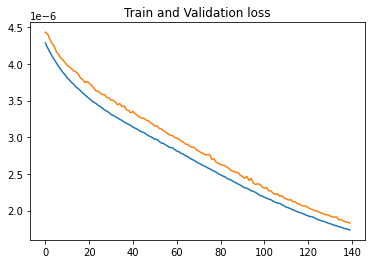

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

history = trainer.history()

plt.plot(history['train_loss'][10:])
plt.plot(history['val_loss'][10:])
plt.title('Train and Validation loss')
plt.show()

## Evaluation

In [10]:
trainer.evaluation(test_loader, device)

mse : 1.0654050394502217e-06


## model save

In [11]:
model = trainer.get_best_model()
model.to('cpu')
torch.save(model.state_dict(), 'model.pt')